In [3]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 4.2 MB/s 


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import FinanceDataReader as fdr

### START CODE HERE ###
df_train = fdr.DataReader("005930", start = "2000-01-04", end = "2013-12-31")
df_test = fdr.DataReader("005930", start = "2014-01-01", end = "2022-06-17")
### END CODE HERE ###

training_set = df_train.iloc[:, 3:4].values
test_set = df_test.iloc[:, 3:4].values

# assert training_set.shape == (2767,1)
# assert test_set.shape == (2618,1)

Text(0, 0.5, 'price($)')

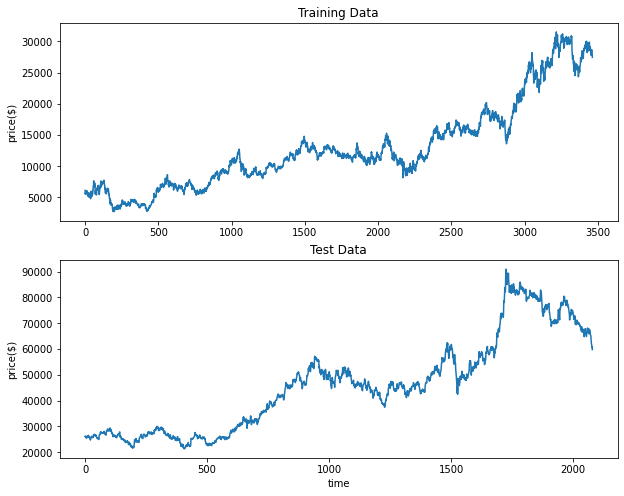

In [5]:
plt.rcParams["figure.figsize"] = (10,8)
plt.subplot(2, 1, 1)
plt.plot(training_set)
plt.title("Training Data")
plt.ylabel('price($)')

plt.subplot(2, 1, 2)
plt.plot(test_set)
plt.title("Test Data")
plt.xlabel('time')
plt.ylabel('price($)')

Text(0, 0.5, 'scaled price($)')

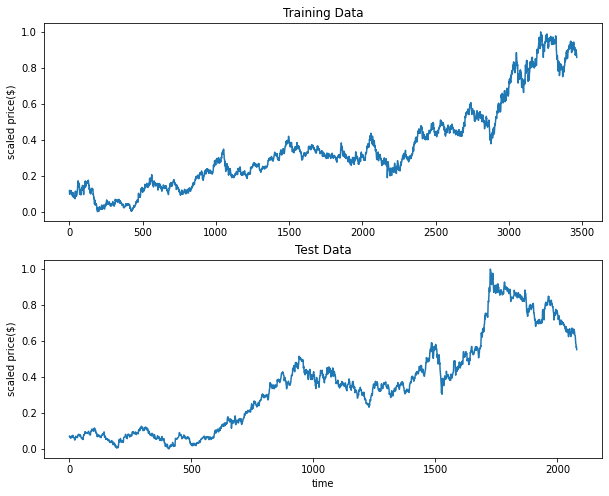

In [6]:
sc1 = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc1.fit_transform(training_set)
sc2 = MinMaxScaler(feature_range=(0,1))
test_set_scaled = sc2.fit_transform(test_set)

plt.rcParams["figure.figsize"] = (10,8)
plt.subplot(2, 1, 1)
plt.plot(training_set_scaled)
plt.title("Training Data")
plt.ylabel('scaled price($)')

plt.subplot(2, 1, 2)
plt.plot(test_set_scaled)
plt.title("Test Data")
plt.xlabel('time')
plt.ylabel('scaled price($)')

In [7]:
X_train = []
Y_train = []
for i in range(30, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-30:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
Y_test = []
for i in range(30, test_set_scaled.shape[0]):
    X_test.append(test_set_scaled[i-30:i, 0])
    Y_test.append(test_set_scaled[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
model = Sequential()
### START CODE HERE ###
model.add(LSTM(50, input_shape= (30, 1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50, input_shape= (30, 1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50, input_shape= (30, 1), return_sequences=True))
model.add(Dropout(0.5))
# model.add(LSTM(50, input_shape= (30, 1), return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(50, input_shape= (30, 1), return_sequences=True))
# model.add(Dropout(0.5))
model.add(LSTM(50, input_shape= (30, 1), return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
### END CODE HERE ###

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
108/108 [==============================] - 15s 69ms/step - loss: 0.0147
Epoch 2/100
108/108 [==============================] - 7s 69ms/step - loss: 0.0062
Epoch 3/100
108/108 [==============================] - 8s 73ms/step - loss: 0.0052
Epoch 4/100
108/108 [==============================] - 9s 81ms/step - loss: 0.0049
Epoch 5/100
108/108 [==============================] - 8s 73ms/step - loss: 0.0043
Epoch 6/100
108/108 [==============================] - 8s 72ms/step - loss: 0.0047
Epoch 7/100
108/108 [==============================] - 8s 73ms/step - loss: 0.0038
Epoch 8/100
108/108 [==============================] - 8s 72ms/step - loss: 0.0034
Epoch 9/100
108/108 [==============================] - 8s 77ms/step - loss: 0.0034
Epoch 10/100
108/108 [==============================] - 8s 73ms/step - loss: 0.0035
Epoch 11/100
108/108 [==============================] - 9s 79ms/step - loss: 0.0030
Epoch 12/100
108/108 [==============================] - 10s 91ms/step - loss: 0.0031

In [1]:
predicted_X_train = model.predict(X_train)
predicted_X_train = sc1.inverse_transform(predicted_X_train)

predcited_X_test = model.predict(X_test)
predcited_X_test = sc2.inverse_transform(predcited_X_test)

mean_train_error = np.average(np.abs(training_set[29:-1,:] - predicted_X_train))
mean_test_error = np.average(np.abs(test_set[29:-1,:] - predcited_X_test))


print("평균 training error:", mean_train_error)
print("평균 test error:",mean_test_error)

NameError: ignored

60
평균 training error: 667.1088654891304
평균 test error: 1851.623803360265

30 *
평균 training error: 515.8271684863224
평균 test error: 1479.541924986274

20
평균 training error: 652.482894489851
평균 test error: 1952.0896929258743

30 32
평균 training error: 433.1259032634364
평균 test error: 1272.8158829383235

30 32 레이어 6 -> 5
평균 training error: 414.58901271920047
평균 test error: 1200.5198496217668

30 32 레이어 5 -> 4
평균 training error: 278.8966407131579
평균 test error: 745.1866182817838

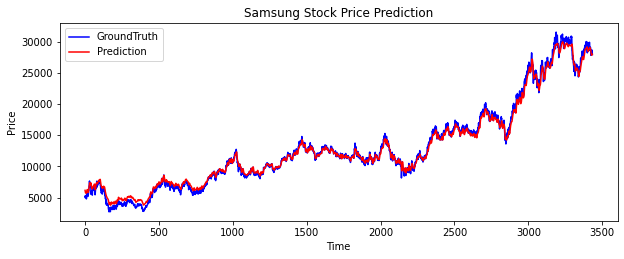

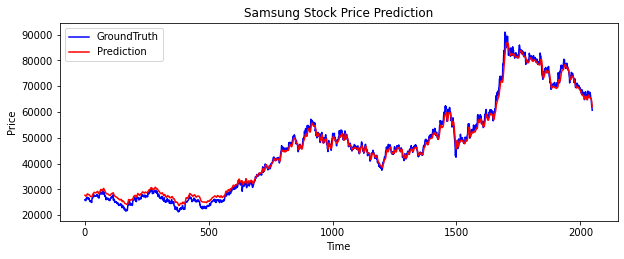

In [56]:
plt.subplot(2, 1, 1)
plt.plot(training_set[29:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predicted_X_train, color = 'red', label = 'Prediction')
plt.title('Samsung Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(test_set[29:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predcited_X_test, color = 'red', label = 'Prediction')
plt.title('Samsung Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [57]:
from google.colab import drive
drive.mount('/content/drive')
! pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [58]:
import tensorflow as tf
from keras.models import save_model, load_model

model.save('drive/MyDrive/please_save_me30326_5.h5')

In [59]:
recent_model = load_model('drive/MyDrive/please_save_me30326_5.h5')

predicted_X_train = recent_model.predict(X_train)
predicted_X_train = sc1.inverse_transform(predicted_X_train)

predcited_X_test = recent_model.predict(X_test)
predcited_X_test = sc2.inverse_transform(predcited_X_test)

mean_train_error = np.average(np.abs(training_set[29:-1,:] - predicted_X_train))
mean_test_error = np.average(np.abs(test_set[29:-1,:] - predcited_X_test))


print("평균 training error:", mean_train_error)
print("평균 test error:",mean_test_error)

평균 training error: 414.58901271920047
평균 test error: 1200.5198496217668


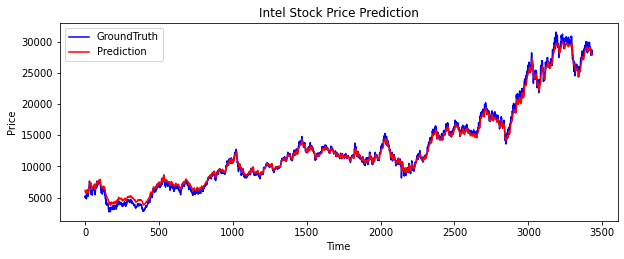

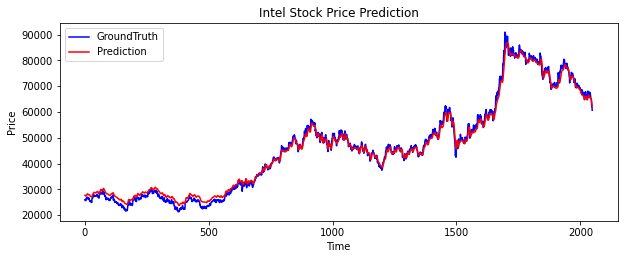

In [60]:
plt.subplot(2, 1, 1)
plt.plot(training_set[29:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predicted_X_train, color = 'red', label = 'Prediction')
plt.title('Intel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(test_set[29:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predcited_X_test, color = 'red', label = 'Prediction')
plt.title('Intel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()